In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir('.'))

# Any results you write to the current directory are saved as output.

['train.7z', 'test.7z', '.ipynb_checkpoints', 'sample_submission.7z', 'sample_submission.csv', 'sc.sh', 'link_to_gcp_credits_form.txt', 'train', 'data_work.ipynb', 'test', 'EDA.ipynb']


In [2]:
train_audio_path = 'train/audio/'
test_audio_path = 'test/audio/'
filename = '/yes/0a7c2a8d_nohash_0.wav'

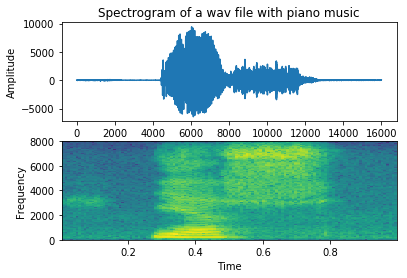

In [3]:
samplingFrequency, signalData = wavfile.read(str(train_audio_path) + filename)

plt.subplot(211)
plt.title('Spectrogram of a wav file with piano music')
plt.plot(signalData)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(212)
plt.specgram(signalData,Fs=samplingFrequency)
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()

In [4]:
res = {}
# DIR = BASE + 'audio/'

# for i in next(os.walk('../input/train/audio/'))[1]:
#     res[i] = [len([name for name in os.listdir(DIR + i) if os.path.isfile(os.path.join(DIR + i, name))])]

# info = pd.DataFrame.from_dict(res)


for i in next(os.walk(train_audio_path))[1]:
    res[i] = len([name for name in os.listdir(train_audio_path + i) if os.path.isfile(os.path.join(train_audio_path + i, name))])
info = pd.Series(res)
print (info)

_background_noise_       7
bed                   1713
bird                  1731
cat                   1733
dog                   1746
down                  2359
eight                 2352
five                  2357
four                  2372
go                    2372
happy                 1742
house                 1750
left                  2353
marvin                1746
nine                  2364
no                    2375
off                   2357
on                    2367
one                   2370
right                 2367
seven                 2377
sheila                1734
six                   2369
stop                  2380
three                 2356
tree                  1733
two                   2373
up                    2375
wow                   1745
yes                   2377
zero                  2376
dtype: int64


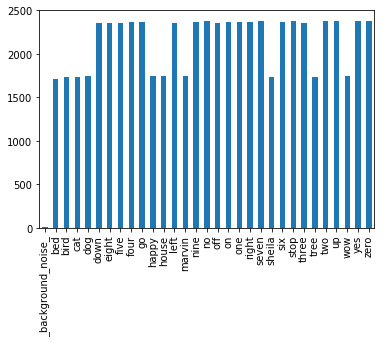

In [5]:
 plt.figure();

info.plot(kind="bar")

In [8]:
#Less than a second

num_of_shorter = 0

for i in next(os.walk(train_audio_path))[1]:
    waves = [f for f in os.listdir(os.path.join(train_audio_path, i)) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + i + '/' + wav)
        if samples.shape[0] < sample_rate:
            num_of_shorter += 1
print('Number of recordings shorter than 1 second: ' + str(num_of_shorter))
#     print(waves)

/usr/local/lib/python3.5/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Number of recordings shorter than 1 second: 6469


In [ ]:
!cat ../input/train/testing_list.txt

In [ ]:
!cat ../input/train/validation_list.txt